In [8]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
files = glob(f'predictors*.xlsx')
df = pd.concat(pd.read_excel(excel_file) for excel_file in files)

In [4]:
df.head()

,model,score_test,roc_auc,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,average_precision,precision,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,NeuralNetFastAI_r194_FULL,1.0,1.0,0.90625,0.94,0.823529,0.879850,0.90625,1.0,0.700000,...,"{'layers': [400, 200, 100], 'emb_drop': 0.5117...","{'epochs': 21, 'best_epoch': 12}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
1,NeuralNetFastAI_r187_FULL,1.0,1.0,0.87500,0.92,0.777778,0.845411,0.87500,1.0,0.636364,...,"{'layers': [200, 100, 50], 'emb_drop': 0.50749...","{'epochs': 42, 'best_epoch': 26}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
2,NeuralNetFastAI_r100_FULL,1.0,1.0,0.84375,0.90,0.736842,0.812865,0.84375,1.0,0.583333,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
3,NeuralNetFastAI_r69_FULL,1.0,1.0,0.87500,0.92,0.777778,0.845411,0.87500,1.0,0.636364,...,"{'layers': [200, 100, 50], 'emb_drop': 0.32096...","{'epochs': 21, 'best_epoch': 10}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
4,NeuralNetFastAI_r138_FULL,1.0,1.0,0.84375,0.90,0.736842,0.812865,0.84375,1.0,0.583333,...,"{'layers': [800, 400], 'emb_drop': 0.086691092...","{'epochs': 45, 'best_epoch': 26}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]


In [24]:
y_lim = (0.65, 1)

C:\Users\jgala\AppData\Local\Temp\ipykernel_16044\753663690.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['model'] = pd.Categorical(df_top['model'], categories=orden_modelos, ordered=True)


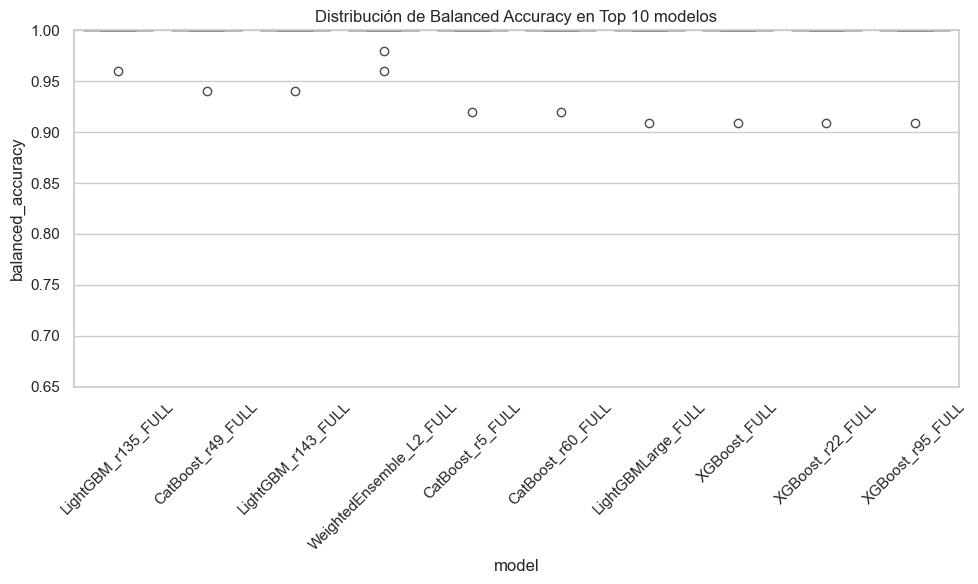

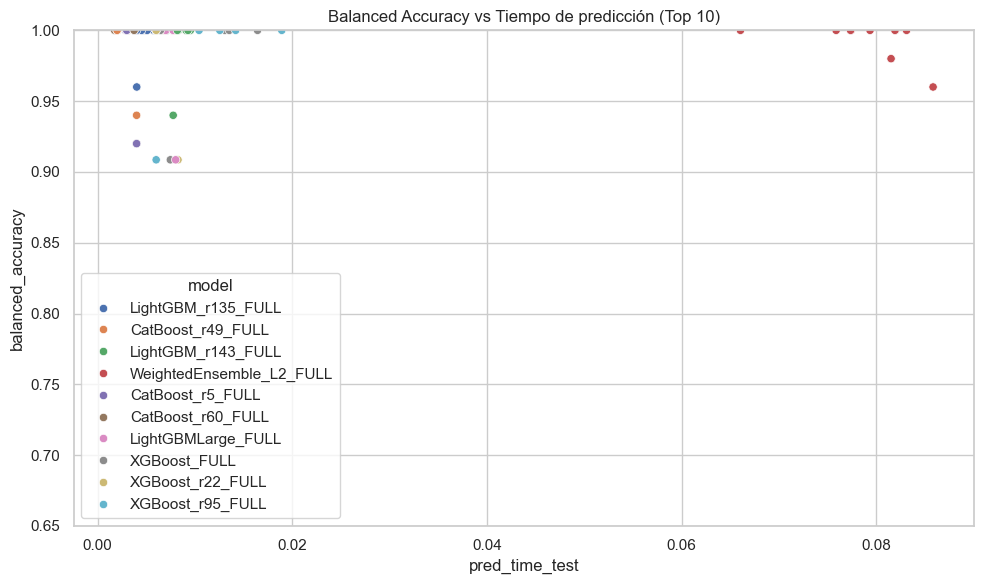

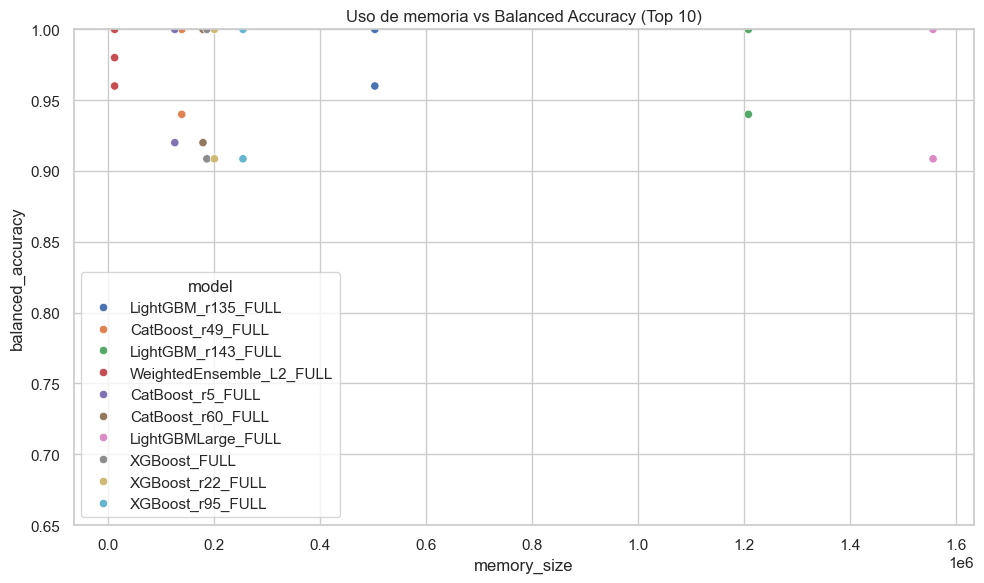

C:\Users\jgala\AppData\Local\Temp\ipykernel_16044\753663690.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metricas = df_top.groupby('model')[metricas].mean()


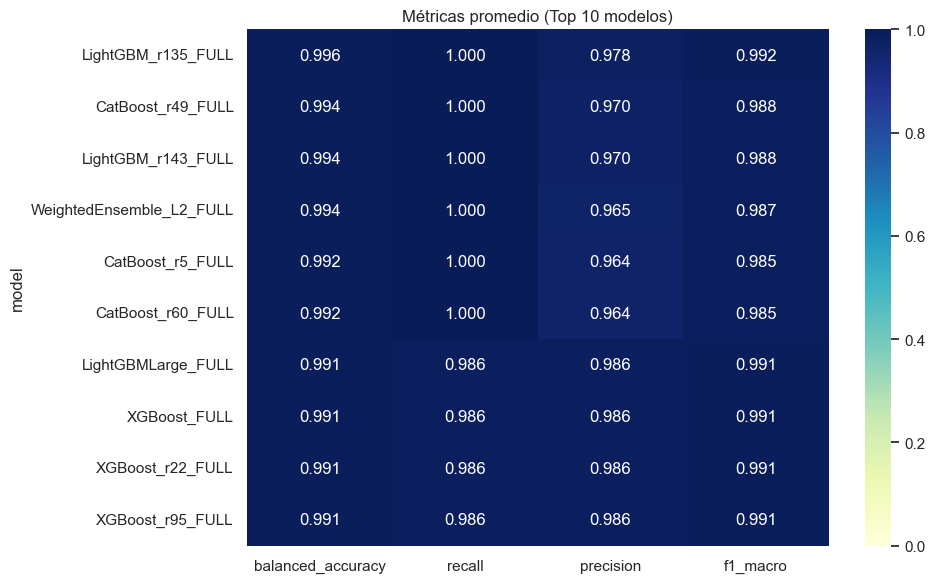

In [25]:
# === 1. SELECCIÓN DE LOS 10 MEJORES MODELOS POR BALANCED ACCURACY ===
top_models = (
    df.groupby('model')
      .agg(mean_balanced_acc=('balanced_accuracy', 'mean'))
      .sort_values(by='mean_balanced_acc', ascending=False)
      .head(10)
      .index
)

df_top = df[df['model'].isin(top_models)]

# Ordenar df_top por modelo según rendimiento
orden_modelos = (
    df_top.groupby('model')['balanced_accuracy']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)
df_top['model'] = pd.Categorical(df_top['model'], categories=orden_modelos, ordered=True)

# === 2. DISTRIBUCIÓN DE BALANCED ACCURACY (BOXPLOT) ===
plt.figure()
sns.boxplot(data=df_top, x='model', y='balanced_accuracy', order=orden_modelos)
plt.xticks(rotation=45)
plt.ylim(y_lim)
plt.title("Distribución de Balanced Accuracy en Top 10 modelos")
plt.tight_layout()
plt.show()

# === 4. BALANCED ACCURACY VS TIEMPO DE PREDICCIÓN ===
plt.figure()
sns.scatterplot(data=df_top, x='pred_time_test', y='balanced_accuracy', hue='model')
plt.ylim(y_lim)
plt.title("Balanced Accuracy vs Tiempo de predicción (Top 10)")
plt.tight_layout()
plt.show()

# === 5. BALANCED ACCURACY VS USO DE MEMORIA ===
plt.figure()
sns.scatterplot(data=df_top, x='memory_size', y='balanced_accuracy', hue='model')
plt.ylim(y_lim)
plt.title("Uso de memoria vs Balanced Accuracy (Top 10)")
plt.tight_layout()
plt.show()

# === 6. HEATMAP DE MÉTRICAS COMPLEMENTARIAS ===
metricas = ['balanced_accuracy', 'recall', 'precision', 'f1_macro']
df_metricas = df_top.groupby('model')[metricas].mean()
df_metricas = df_metricas.loc[orden_modelos]  # Asegurar orden

plt.figure()
sns.heatmap(df_metricas, annot=True, fmt=".3f", cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Métricas promedio (Top 10 modelos)")
plt.tight_layout()
plt.show()